## EXAMEN 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats
#sns.set(rc={'figure.figsize':(12, 8.5)})
sns.set()

# Apartado 1
Lee el fichero de datos y crea un data.frame de R llamado frami, que usaremos para el resto del examen.
+ C1: ¿Cuántas observaciones hay en la tabla? ¿Cuántas variables?
+ C2: ¿Hay datos ausentes? ¿De qué tipo son las variables?
+ C3: Antes de seguir adelante vamos a eliminar todas las observaciones que contienen datos ausentes.Asegúrate de que el conjunto de datos resultante se sigue llamando frami. ¿Cuántas observaciones han quedado en la tabla tras eliminar los datos ausentes?

 ## C1
 +  ¿Cuántas observaciones hay en la tabla? ¿Cuántas variables?

In [2]:
frami = pd.read_csv("PreviousExams/data/frami.csv")
frami.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
frami.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
frami.shape[0] #Numero de observaciones

4240

In [5]:
frami.shape[1] #16 columnas

16

In [6]:
frami.columns #Nombres de las variables de las columnas

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Miramos si tenemos datos ausentes y vemos de que tipo son las variables

## C2
+ ¿Hay datos ausentes? ¿De qué tipo son las variables?

In [7]:
print("Are there values NaN?:\n",frami.isnull().values.any())
print("Attributes values NaN :\n",frami.isnull().sum())
print("Total number of NaN:\n",frami.isnull().sum().sum())

Are there values NaN?:
 True
Attributes values NaN :
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
Total number of NaN:
 645


In [8]:
type(frami.loc[frami.education.isna()])

pandas.core.frame.DataFrame

In [9]:
frami.loc[frami.glucose.isna(),'glucose'].dtypes

dtype('float64')

## C3
+ Antes de seguir adelante vamos a eliminar todas las observaciones que contienen datos ausentes.Asegúrate de que el conjunto de datos resultante se sigue llamando frami. ¿Cuántas observaciones han quedado en la tabla tras eliminar los datos ausentes?

In [10]:
frami.dropna(inplace=True)

In [11]:
print("Are there values NaN?:\n",frami.isnull().values.any())

Are there values NaN?:
 False


In [12]:
frami.shape[0] #Han quedado 3658 observaciones
len(frami)

3658

## Apartado 2.
+ C4: Vamos a analizar la posible relación entre el factor género (variable male) y el factor fumador (variable currentSmoker). Haz un análisis mediante gráficos de esa relación. Calcula la tabla de probabilidad, con probabilidades marginales, asociada a la relación entre estos dos factores.
+ C5: ¿Cuál es la probabilidad de que un fumador sea mujer?
+ C6: ¿Y cuál es la probabilidad de que un hombre sea fumador?
+ C7: ¿Cuál es la probabilidad de que una persona elegida al azar sea fumadora? ¿Y de que sea a la vez hombre y no fumador?
+ C8: Si las dos variables aleatorias género male y condición de fumador currentSmoker fueran independientes se cumpliría exactamente:
+ P(hombre y fumador ) = P(hombre) · P(fumador )
+ Pero los datos que tenemos son muestrales, así que lo más que podemos esperar es una igualdad aproximada. ¿Se cumple esa igualdad aproximada en nuestros datos? ¿Qué opinas sobre la independencia de estas variables?
+ C9: Si elegimos de forma independiente (con remplazamiento) 10 personas de esta muestra, ¿cuál es la probabilidad de que 4 de ellas sean fumadoras? ¿Y cuál es la probabilidad de que lo sean 4 o menos?

## C4
+ Vamos a analizar la posible relación entre el factor género (variable male) y el factor fumador (variable currentSmoker). Haz un análisis mediante gráficos de esa relación. Calcula la tabla de probabilidad, con probabilidades marginales, asociada a la relación entre estos dos factores.

In [13]:
CT = pd.crosstab(frami['currentSmoker'], frami['male'])
CT

male,0,1
currentSmoker,,
0,1227,642
1,808,981


In [17]:
! pip install matplotlib --upgrade --user

male               0      1
currentSmoker              
1              45.16  54.84
0              65.65  34.35


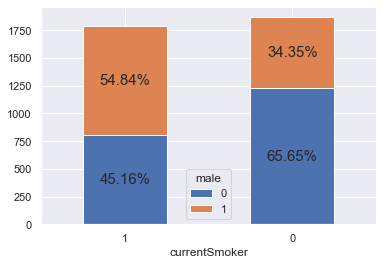

In [14]:
# We add to the table the totals for each row
CT['total'] = CT.sum(axis=1)
# Sort the table using those totals
CT.sort_values('total', inplace=True)

# Remove them so thay do not interfere with the graphic
CT2= CT.drop(columns='total')

percents = CT2.div(CT.total, axis = 0).mul(100).round(2)
#La tabla percents seria la tabla de las probabilidades
percents.to_numpy()
print(percents)

percents.iloc[:, 0]
ax = CT2.plot.bar(stacked = True, rot = 0)

for i in range(len(ax.containers)):
    c = ax.containers[i]  
    # percent labels (or empty string below a threshold for close to 0%)
    labels = [f'{v:2.2f}%' if (v > 1) else '' for v in percents.iloc[:, i]]  
    # add labels to bars
    ax.bar_label(c, labels=labels, label_type='center',   fontsize=15)

plt.show()

matplotlib: 3.3.4


In [15]:
CT = pd.crosstab(frami['male'], frami['currentSmoker'])
CT

currentSmoker,0,1
male,,
0,1227,808
1,642,981


In [ ]:
# We add to the table the totals for each row
CT['total'] = CT.sum(axis=1)
# Sort the table using those totals
CT.sort_values('total', inplace=True)
# Remove them so thay do not interfere with the graphic
CT2= CT.drop(columns='total')

percents = CT2.div(CT.total, axis = 0).mul(100).round(2)
percents.iloc[:, 0]
ax = CT2.plot.bar(stacked = True, rot = 0)

for i in range(len(ax.containers)):
    c = ax.containers[i]  
    # percent labels (or empty string below a threshold for close to 0%)
    labels = [f'{v:2.2f}%' if (v > 1) else '' for v in percents.iloc[:, i]]  
    # add labels to bars
    ax.bar_label(c, labels=labels, label_type='center',   fontsize=15)

plt.show()

## C5 (Duda)
+ ¿Cuál es la probabilidad de que un fumador sea mujer?

In [308]:
p_mujer=frami.loc[(frami.currentSmoker ==1), 'male'].value_counts(normalize=True)
print(p_mujer)
print('La probabilidad de que un fumador sea mujer es {:.4}'.format(p_mujer[0]))

1    0.548351
0    0.451649
Name: male, dtype: float64
La probabilidad de que un fumador sea mujer es 0.4516


In [311]:
#Voy a sacar todas las mujeres que fumen y lo divido entre todos los fumadores
mujersm=len(frami.loc[(frami.male==0)&(frami.currentSmoker==1)])
mujersm
mujer=len(frami.loc[(frami.currentSmoker==1)])
p=mujersm/mujer
print("La probabilidad de que una mujer fume :",p)

La probabilidad de que una mujer fume : 0.45164896590273895


## C6 (Duda)
+ ¿Y cuál es la probabilidad de que un hombre sea fumador?

In [310]:
p_hombre=frami.loc[(frami.male ==1), 'currentSmoker'].value_counts(normalize=True)
print(p_hombre)
print('La probabilidad de que un fumador sea mujer es {:.4}'.format(p_hombre[1]))

1    0.604436
0    0.395564
Name: currentSmoker, dtype: float64
La probabilidad de que un fumador sea mujer es 0.6044


In [313]:
#Voy a coger todos los hombres que fumen y lo voy a dividir entre el total de hombres
malesm=len(frami.loc[(frami.male==1)&(frami.currentSmoker==1)])
malesm
male=len(frami.loc[(frami.male==1)])
p=malesm/male
print("La probabilidad de que un hombre fume :",p)

La probabilidad de que un hombre fume : 0.6044362292051756


## C7 
+ ¿Cuál es la probabilidad de que una persona elegida al azar sea fumadora? ¿Y de que sea a la vez hombre y no fumador?

In [99]:
frami_smoke=len(frami.loc[(frami.currentSmoker==1)])
print(f'Hay {frami_smoke} fumadores en total')
prob_smoke=frami_smoke/len(frami)
print(f'La probabilidad de que sea fumador es {prob_smoke}')

Hay 1789 fumadores en total
La probabilidad de que sea fumador es 0.48906506287588847


In [318]:
#MUCHAS FORMAS DE HACERLO
smoke=frami['currentSmoker']==1
print(smoke.sum())
prob_smoke2=smoke.sum()/len(frami)
print(prob_smoke2)

#Otra forma de sacar la probabilidad de que sea fumador 
p2=np.mean(frami['currentSmoker']==1)
print(p2)

#Otra forma de sacar la probabilidad de que sea fumador 
frami_smoke2=(frami.currentSmoker==1).value_counts(normalize=True)
print(frami_smoke2)
print(f'La probabilidad de que sea fumador es {prob_smoke2[True]}')

1789
0.48906506287588847
0.48906506287588847
False    0.510935
True     0.489065
Name: currentSmoker, dtype: float64
La probabilidad de que sea fumador es [0.48906506]


In [321]:
frami_smoke_male=len(frami.loc[(frami.currentSmoker==0) & (frami.male==1)])
prob_smoke_male=frami_smoke_male/len(frami)
print(f'La probabilidad de que sea hombre y no fumador es {prob_smoke_male}')

La probabilidad de que sea hombre y no fumador es 0.17550574084199017


## C8 
+ Si las dos variables aleatorias género male y condición de fumador currentSmoker fueran independientes se cumpliría exactamente:
+ P(hombre y fumador ) = P(hombre) · P(fumador )
+ Pero los datos que tenemos son muestrales, así que lo más que podemos esperar es una igualdad aproximada. ¿Se cumple esa igualdad aproximada en nuestros datos? ¿Qué opinas sobre la independencia de estas variables?

In [322]:
frami_male=len(frami.loc[(frami.male==1)])
prob_male=frami_male/len(frami)
print(prob_male)

0.4436850738108256


In [323]:
p_male_fumador_ind=prob_male*prob_smoke
print(p_male_fumador_ind)

0.21699086852038466


## C9
+ Si elegimos de forma independiente (con remplazamiento) 10 personas de esta muestra, ¿cuál es la probabilidad de que 4 de ellas sean fumadoras? ¿Y cuál es la probabilidad de que lo sean 4 o menos?

In [324]:
p_smoke=np.mean(frami['currentSmoker']==1)
print('La probabilidad de fumador es {:.4}'.format(p_smoke))

#probabilidad de 4 fumadoras
p_smoke_4=stats.binom.pmf(4, n = 10, p = p_smoke) 
print('La probabilidad de que haya 4 fumadoras es {:.4}'.format(p_smoke_4))

#probabilidad 4 o menos
p_4=stats.binom.pmf(4, n = 10, p = p_smoke) 
p_3=stats.binom.pmf(3, n = 10, p = p_smoke)
p_2=stats.binom.pmf(2, n = 10, p = p_smoke) 
p_1=stats.binom.pmf(1, n = 10, p = p_smoke)
p_0=stats.binom.pmf(0, n = 10, p = p_smoke)
p_4_menos=p_4+p_3+p_2+p_1+p_0

print('La probabilidad de que 4 o menos sean fumadoras es {:.4}'.format(p_4_menos))

#Otra forma de hacerlo es 
n=10
p_menos=stats.binom.cdf(4, n, p_smoke)

print('La probabilidad de que 4 o menos sean fumadoras es {:.4}'.format(p_menos))


La probabilidad de fumador es 0.4891
La probabilidad de que haya 4 fumadoras es 0.2137
La probabilidad de que 4 o menos sean fumadoras es 0.4041
La probabilidad de que 4 o menos sean fumadoras es 0.4041


### Apartado 3.
+ C10: En este apartado trabajamos con la variable heartRate, la frecuencia cardiaca. Haz un resumennumérico básico. ¿Es representativa la media? Represénta la variable gráficamente (puuedes usar másde un tipo de gráfico). Se valorará especialmente el uso de ggplot.
+ C11: ¿Hay datos atípicos? ¿Cuántos? ¿Sabes qué posiciones (número de fila) ocupan en la tabla?
+ C12: ¿Crees que está variable es aproximadamente normal? Justifica tu conclusión basándote en losgráficos del apartado anterior o en algún gráfico adicional.
+ C13: Asumiendo que es aproximadamente normal (sea cual sea tu conclusión del apartado anterior)construye un intervalo de confianza al 95% para la media de esta variable,

## C10 (DUDAS)
+ En este apartado trabajamos con la variable heartRate, la frecuencia cardiaca. Haz un resumennumérico básico. ¿Es representativa la media? Represénta la variable gráficamente (puuedes usar másde un tipo de gráfico). Se valorará especialmente el uso de ggplot.

In [169]:
frami.heartRate.describe()

count    3658.000000
mean       75.730727
std        11.981525
min        44.000000
25%        68.000000
50%        75.000000
75%        82.000000
max       143.000000
Name: heartRate, dtype: float64

Como el factor de dispersion es 15.821220540889506 la media tiene una alta representatividad


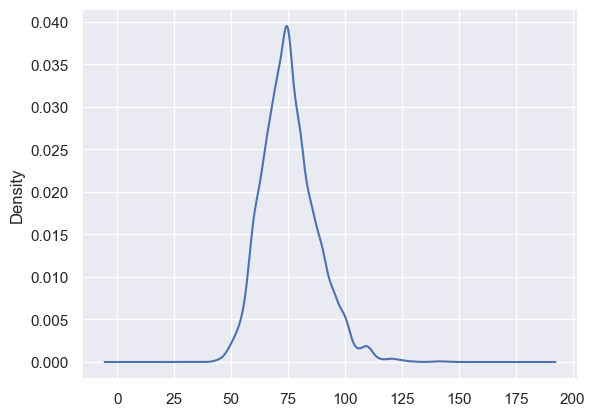

In [172]:
barX=frami.heartRate.mean()
s=frami.heartRate.std()
dispersion=(s/barX)*100
print(f'Como el factor de dispersion es {dispersion} la media tiene una alta representatividad')

getPlot = frami.heartRate.plot.density()

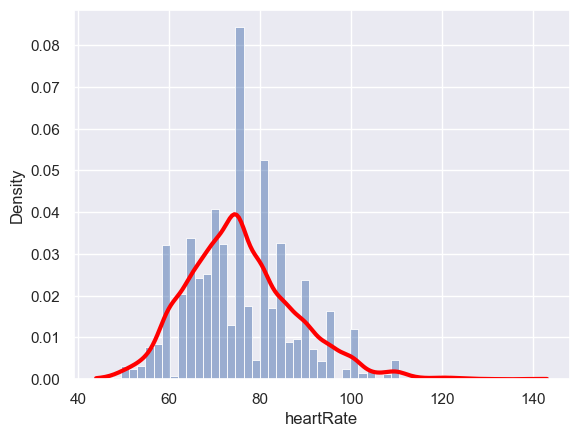

In [108]:
dens_plot = sns.histplot(data = frami, x = 'heartRate', kde=True, stat='density')
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)

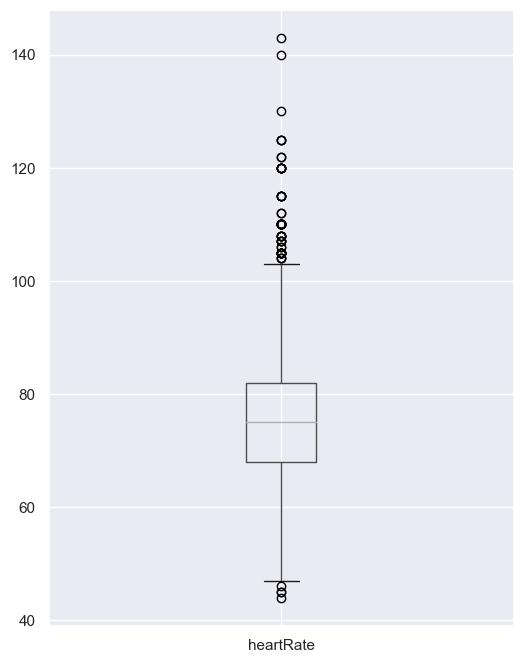

In [109]:
getPlot = frami.boxplot(column='heartRate', figsize=(6, 8))

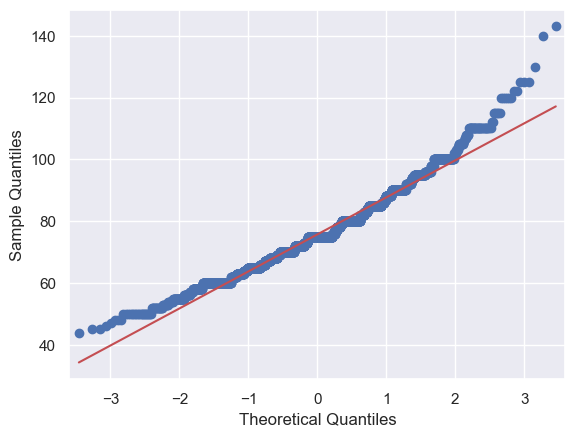

In [221]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
sm.qqplot(frami.heartRate, line="s")
plt.show()

## C11 (Datos atipicos)
+ ¿Hay datos atípicos? ¿Cuántos? ¿Sabes qué posiciones (número de fila) ocupan en la tabla?

In [222]:
frami.heartRate.describe()

count    3658.000000
mean       75.730727
std        11.981525
min        44.000000
25%        68.000000
50%        75.000000
75%        82.000000
max       143.000000
Name: heartRate, dtype: float64

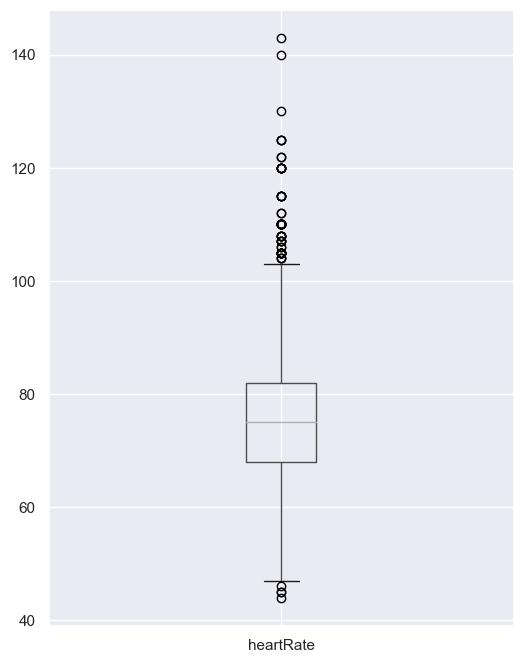

In [325]:
getPlot = frami.boxplot(column='heartRate', figsize=(6, 8))

In [326]:
Q1,Q3=np.quantile(frami.heartRate, [0.25, 0.75])

#stats.iqr(frami.heartRate)
IQR=Q3-Q1
print(IQR)

max=Q3+1.5*IQR
min=Q1-1.5*IQR

#Sacar las posiciones que ocupan en la tabla
outliners_max=frami.loc[frami.heartRate>max].index
print(outliners_max)
print(f'Hay {len(outliners_max)} que superan el max')
print("----" * 10)
outliners_min=frami.loc[frami.heartRate<min].index
print(outliners_min)
print(f'Hay {len(outliners_min)} que estan por debajo del limite minimo')
print("-" * 50)

print("Lower and upper outlier limits:", min, ", ", max)
heartRate_outliers = frami.loc[(frami.heartRate < min) | (frami.heartRate > max),'heartRate']
print("The outliers are")
heartRate_outliers

14.0
Int64Index([ 162,  270,  339,  358,  409,  492,  523,  562,  630,  639,  697,
             722,  740,  742,  824,  833,  909,  911,  913,  923,  983, 1008,
            1022, 1182, 1462, 1570, 1728, 1783, 1790, 1807, 1881, 1902, 2041,
            2162, 2180, 2237, 2242, 2275, 2299, 2382, 2388, 2434, 2459, 2482,
            2492, 2646, 2663, 2733, 2750, 2922, 3037, 3112, 3142, 3164, 3194,
            3225, 3231, 3233, 3242, 3343, 3391, 3425, 3495, 3505, 3585, 3747,
            3800, 3819, 3844, 3862, 3875, 3912, 3964, 4053, 4070, 4164],
           dtype='int64')
Hay 76 que superan el max
----------------------------------------
Int64Index([1233, 1844, 3740, 4195], dtype='int64')
Hay 4 que estan por debajo del limite minimo
--------------------------------------------------
Lower and upper outlier limits: 47.0 ,  103.0
The outliers are


162     110.0
270     110.0
339     140.0
358     130.0
409     104.0
        ...  
3964    110.0
4053    125.0
4070    125.0
4164    112.0
4195     46.0
Name: heartRate, Length: 80, dtype: float64

## C12 (Grafico aproxima a la normal)
+ ¿Crees que está variable es aproximadamente normal? Justifica tu conclusión basándote en losgráficos del apartado anterior o en algún gráfico adicional.

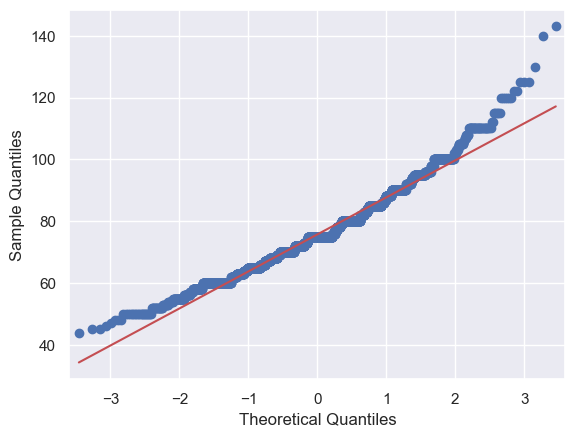

In [327]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
sm.qqplot(frami.heartRate, line="s")
plt.show()
#Usando este diagrama se condidera normal cuando los puntos se ajustan a la linea

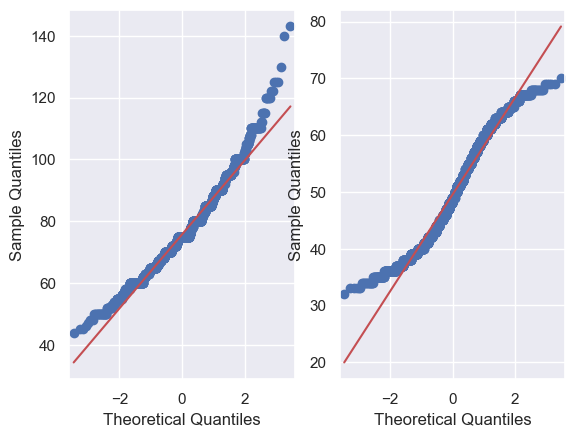

In [328]:
import statsmodels.api as sm
ax1 = plt.subplot(121)
sm.qqplot(frami.heartRate, line="s", ax=ax1)
ax2 = plt.subplot(122)
sm.qqplot(frami.age, line="s", ax = ax2)
plt.show()

## C13 (Asumiendo que es una normal calcula el intervalo de confianza)
+ Asumiendo que es aproximadamente normal (sea cual sea tu conclusión del apartado anterior)construye un intervalo de confianza al 95% para la media de esta variable

In [329]:
n=len(frami) #como no se la longuitud lo hago siempre como t-student
barX=frami.heartRate.mean()
s=frami.heartRate.std()

# Critical point computation:
cl = 0.95
alpha = 1 - cl
dof=n-1

#SACAR LOS CRITERIOS DE CONFIANZA 
crit_point = stats.t.isf(alpha/2, df = dof, loc = 0, scale = 1)

#para sacar el intervalo
conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is ", conf_int)

The confidence interval is  [75.34232459 76.11912976]


## Apartado 4
En las preguntas de este apartado se puede usar R básico o dplyr. Procurad hacer al menos una con dplyr y, en general, combinad varias técnicas para responder a las preguntas.
+ C14: ¿Cuántas personas padecen diabetes? Para las personas que padecen diabetes y que tienen edades superiores a 50 años ¿cuál es su nivel medio de colesterol?
+ C15: Haced una tabla cruzada en la que parezca el nivel medio de colesterol para cada combinación posible de las variables nivel de educación y género (male).

## C14 
+ ¿Cuántas personas padecen diabetes? Para las personas que padecen diabetes y que tienen edades superiores a 50 años ¿cuál es su nivel medio de colesterol?

In [330]:
val=frami.diabetes.unique()
print(val) #0 no tiene diabetes y 1 tiene diabetes

[0 1]


In [331]:
freqs_abs=frami.diabetes.value_counts(normalize=False)
print(freqs_abs)
freqs_rel=frami.diabetes.value_counts(normalize=True)
print(freqs_rel) #La probabilidad de tener diabetes

0    3559
1      99
Name: diabetes, dtype: int64
0    0.972936
1    0.027064
Name: diabetes, dtype: float64


In [332]:
#Saco la gente que tiene diabetes
f0,f1=frami.diabetes.value_counts() 
print(f'Hay {f1} que tienen diabetes')

Hay 99 que tienen diabetes


In [246]:
#Calculo la probabilidad de tener diabetes
diabetes=frami.loc[(frami.diabetes==1), 'age'] #solo me queda la columna de la edad
print(f'Tienen {len(diabetes)} personas diabetes')
#---
p_diabetes=len(diabetes)/(len(frami))
print(f'La probabilidad de tener diabetes es de {p_diabetes}')

Tienen 99 personas diabetes
La probabilidad de tener diabetes es de 0.02706396938217605


In [335]:
diabetes_mas_50=diabetes> 50
print(diabetes_mas_50)
personas_mas_de_50=diabetes_mas_50.sum()
print(f'Hay {personas_mas_de_50} que tienen mas de 50 años y diabetes')

37       True
44       True
56       True
66       True
96       True
        ...  
4096     True
4154     True
4203     True
4215     True
4228    False
Name: age, Length: 99, dtype: bool
Hay 71 que tienen mas de 50 años y diabetes


In [334]:
mas_de_50=frami.loc [(frami['age']>50) & (frami['diabetes']==1),'totChol']
print(f'La media colesterol de las personas que tienen mas de 50 años y diabetes es {mas_de_50.mean()}')

La media colesterol de las personas que tienen mas de 50 años y diabetes es 257.6619718309859


## C15 (TABLA CRUZADA) -> NO TENGO NI IDEA
+ Haced una tabla cruzada en la que parezca el nivel medio de colesterol para cada combinación posible de las variables nivel de educación y género (male).

In [195]:
CT = pd.crosstab(frami['education'], frami['male'])
CT

male,0,1
education,,
1.0,815,711
2.0,650,451
3.0,398,210
4.0,172,251


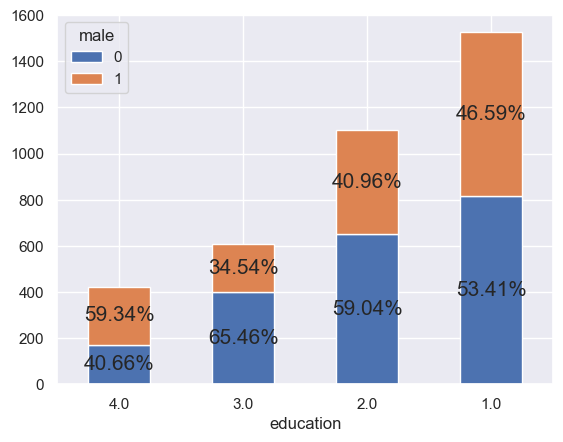

In [121]:
# We add to the table the totals for each row
CT['total'] = CT.sum(axis=1)
# Sort the table using those totals
CT.sort_values('total', inplace=True)
# Remove them so thay do not interfere with the graphic
CT2= CT.drop(columns='total')

percents = CT2.div(CT.total, axis = 0).mul(100).round(2)
percents.iloc[:, 0]
ax = CT2.plot.bar(stacked = True, rot = 0)

for i in range(len(ax.containers)):
    c = ax.containers[i]  
    # percent labels (or empty string below a threshold for close to 0%)
    labels = [f'{v:2.2f}%' if (v > 1) else '' for v in percents.iloc[:, i]]  
    # add labels to bars
    ax.bar_label(c, labels=labels, label_type='center',   fontsize=15)

plt.show() 

## Apartado 5
+ C16: Analicemos ahora la posible relación entre las variables presión sistólica sysBP y presióndiastólica diaBP. Haz un diagrama de dispersión y un modelo de regresión lineal usando sysBP comovariable respuesta y diaBP como variable explicativa. Añade la recta de regresión lineal al diagrama de dispersión.
+ C17: ¿Crees que el modelo de regresión lineal es adecuado para describir la relación entre esas variables?
+ C18: ¿Qué porcentaje de la variabilidad en diaBP se explica con ese modelo de regresión?
+ C19: ¿Cuál es el valor de diaBP que predice el modelo para alguien con sysBP igual a 160? Se valora el uso de predict.
+ C20: ¿Cuál es el residuo de la primera observación de la tabla?

## C16:
+ Analicemos ahora la posible relación entre las variables presión sistólica sysBP y presióndiastólica diaBP. Haz un diagrama de dispersión y un modelo de regresión lineal usando sysBP comovariable respuesta y diaBP como variable explicativa. Añade la recta de regresión lineal al diagrama de dispersión.

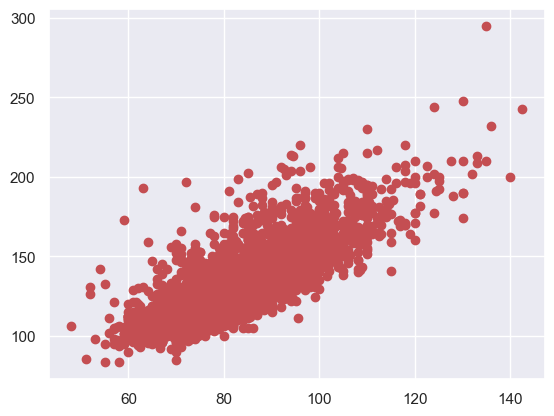

In [122]:
plt.plot(frami.diaBP, frami.sysBP, 'ro') #pinta la muestra

In [266]:
#Creo un modelo de regresion lineal

X = sm.add_constant(frami.diaBP)
Y = frami.sysBP.values.reshape(len(Y),1)

model_D01 = sm.OLS(Y, X)
D01_fit = model_D01.fit()
D01_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     5936.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:39:45   Log-Likelihood:                -14747.
No. Observations:                3658   AIC:                         2.950e+04
Df Residuals:                    3656   BIC:                         2.951e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0551      1.578      7.640      0.000       8.962      15.149
diaBP          1.4510      0.019     77.045      0.000       1.414       1.488
==============================================================================
Omnibus:                      929.609   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2863.079
Skew:                           1.292   Prob(JB):                         0.00
Kurtosis:                       6.480   Cond. No.                         586.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

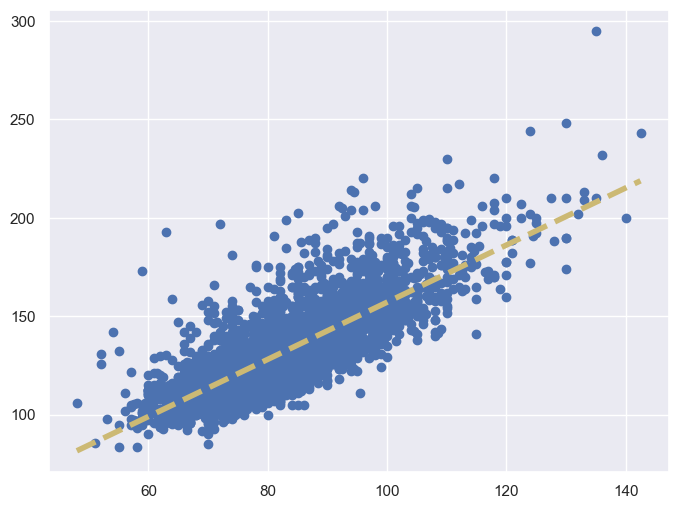

In [267]:
X_new = np.linspace(X.min(), X.max(), 100)
X_new = sm.add_constant(X_new)
D01_fit.pred = D01_fit.get_prediction(X_new)
RD_fit_fitted_new = D01_fit.pred.summary_frame(alpha=0.05)["mean"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X.iloc[:,1], Y, "o", label="data")
ax.plot(X_new[:,1], RD_fit_fitted_new, "y--", lw = 4)

## C17: 
+ ¿Crees que el modelo de regresión lineal es adecuado para describir la relación entre esas variables?

## C18: 
+ ¿Qué porcentaje de la variabilidad en diaBP se explica con ese modelo de regresión?

In [125]:
D01_fit.rsquared #Esta es la variabilidad

0.6188486783818301

## C19: 
+ ¿Cuál es el valor de diaBP que predice el modelo para alguien con sysBP igual a 160? Se valora el uso de predict.

In [284]:
##FORMA DE SACAR UN VALOR CON EL PREDICT
X_new = np.array([1,160])
print(X_new)
X_new = sm.add_constant(X_new)
D01_fit.pred = D01_fit.get_prediction(X_new)
RD_fit_fitted_new = D01_fit.pred.summary_frame(alpha=0.05)["mean"]
print(RD_fit_fitted_new[1])

[  1 160]
244.22060086787155


## C20: 
+ ¿Cuál es el residuo de la primera observación de la tabla?

In [285]:
#SACAR EL VALOR DE LA PRIMERA OBSERVACION DE LA TABLA
frami.head(n=1)
#Su sysBP es 106.0
#su diaBP es 70.0

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,franja_edad,nivelCol
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,"(32, 42]","(100, 200]"


In [279]:
frami_columna=frami.loc[0,['sysBP','diaBP']] #0, es que me selecione la primera obs
print(frami_columna)
print(frami_columna[1]) #X
print(frami_columna[0]) #Y, es el valor que me tiene que dar 

sysBP    106.0
diaBP     70.0
Name: 0, dtype: object
70.0
106.0


In [280]:
#SACAR EL RESIDUO DE LA PRIMERA COLUMNA
X_new = np.array([1,frami_columna[1]])
print(X_new)
X_new = sm.add_constant(X_new)
D01_fit.pred = D01_fit.get_prediction(X_new)
RD_fit_fitted_new = D01_fit.pred.summary_frame(alpha=0.05)["mean"]
print(RD_fit_fitted_new[1])
residuos=frami_columna[0]-RD_fit_fitted_new[1]
print(residuos)

[ 1. 70.]
113.62750048743796
-7.627500487437956


In [281]:
D01_fit.resid[0]

-7.627500487437956

## HECHO TODO DE OTRA MANERA

The regression line is y = 12.0551 + 1.45103 x


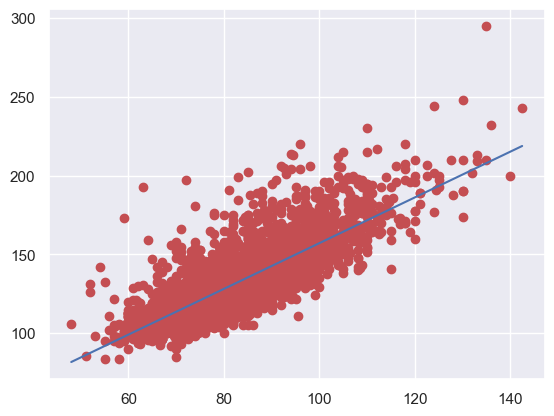

In [278]:
#X = X[:, np.newaxis]
X = frami.diaBP.values.reshape(len(frami), 1)
Y = frami.sysBP

# Now we load the required function from the scikit module
from sklearn.linear_model import LinearRegression
# Create the model
modelXY = LinearRegression(fit_intercept=True) #Para que pase o no pase por el origen
# Fit the model to 
XY_fit = modelXY.fit(X, Y)

# And extract the coefficients. 
# Note that b1 is returned as an array 
b1 = XY_fit.coef_[0]
b0 = XY_fit.intercept_

print("The regression line is y = {:.6} + {:.6} x".format(b0, b1))

#Estos son los valores que vamos a predecir 
X_new = np.linspace(X.min(), X.max()).reshape(-1, 1)
Y_new = XY_fit.predict(X_new)

plt.plot(X, Y, 'ro') #Valores de la grafica 
plt.plot(X_new, Y_new) #Valores que hemos predecido

## Vemos cual es el valor para 160

### Forma 1

In [273]:
#Vemos que no hay ningun 0.3
value=160
np.any(X == value)

False

In [274]:
X_new = np.array([value]).reshape(-1, 1)
Y_new = XY_fit.predict(X_new)
# Look at the predicted value
Y_new

array([244.22060087])

In [275]:
#De una manera manual 
b1 = XY_fit.coef_[0]
b0 = XY_fit.intercept_
print(b0+(b1*value)) #Haciendolo de la manera tradicional

244.22060086787167


### Forma 2

In [131]:
# Create an array from the list of X coordinates of new observtions
X_new = np.array([160]) #Este es el valor que quiero predecir
# Make it 2D
X_new = X_new[:, np.newaxis] #le meto el []
np.any(X == 160) #Vemos que no hay ningun 0.3 en la recta ya # Use the predict method from our model
Y_new = XY_fit.predict(X_new)
print(Y_new)
residuo=frami.sysBP[0]-Y_new
print(residuo)
b1*160+b0 #FORMA MANUAL

[244.22060087]
[-138.22060087]


244.22060086787167

## Apartado 6
+ C21: Pensemos en la variable nivel de colesterol totChol. Sospechamos que el nivel medio de colesterol de las personas de la muestra es mayor que 235. ¿Avalan los datos esta sospecha, con un nivel de significación del 95%?
+ C22: Repite el análisis pero ahora solo con observaciones correspondientes a hombres. Y luego con observaciones de mujeres. ¿Qué piensas sobre la relación entre nivel de colesterol y el género?
+ C23: Estudia la normalidad de la variable edad.

## C21
+ Pensemos en la variable nivel de colesterol totChol. Sospechamos que el nivel medio de colesterol de las personas de la muestra es mayor que 235. ¿Avalan los datos esta sospecha, con un nivel de significación del 95%?

In [286]:
#Esto es una prueba para la hipotesis nula sea igual
Tscore, pValue = stats.ttest_1samp(frami.totChol, 
                                   popmean=235, 
                                   alternative="greater") #Define la hipotesis alternativa

print("The sample size is {:3d}".format(len(frami)))
print("The sample mean is {:.4}".format(frami.totChol.mean()))
print("The sample std is {:.4}".format(frami.totChol.std()))
print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue)) 

#Para compararla al 95% es que alpha es 0.05, como el p-valor es menor que alpha rechazo la hipotesis nula,
#si los datos avalan esta sospecha

The sample size is 3658
The sample mean is 236.8
The sample std is 44.1
The T score is 2.534
And the corresponding p-value is 0.005656


## C22
+  Repite el análisis pero ahora solo con observaciones correspondientes a hombres. Y luego con observaciones de mujeres. ¿Qué piensas sobre la relación entre nivel de colesterol y el género?

In [134]:
#SOLO PARA HOMBRES
chol_hombres=frami.loc[(frami.male==1),'totChol']
#Esto es una prueba para la hipotesis nula sea igual
Tscore, pValue = stats.ttest_1samp(chol_hombres, 
                                   popmean=235, 
                                   alternative="greater") #Define la hipotesis alternativa

print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue)) 
print("The sample size is {:3d}".format(len(chol_hombres)))
print("The sample mean is {:.4}".format(chol_hombres.mean()))
print("The sample std is {:.4}".format(chol_hombres.std()))
#Para compararla al 95% es que alpha es 0.05, como el p-valor es mayor que alpha rechazo la hipotesis alternativa
#por lo que los datos no avalan esta teoria

The T score is -1.592
And the corresponding p-value is 0.9442
The sample size is 1623
The sample mean is 233.4
The sample std is 41.11


In [287]:
#SOLO PARA MUJERES
chol_mujeres=frami.loc[(frami.male==0),'totChol']
#Esto es una prueba para la hipotesis nula sea igual
Tscore, pValue = stats.ttest_1samp(chol_mujeres, 
                                   popmean=235, 
                                   alternative="greater") #Define la hipotesis alternativa

print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue)) 
print("The sample size is {:3d}".format(len(chol_mujeres)))
print("The sample mean is {:.4}".format(chol_mujeres.mean()))
print("The sample std is {:.4}".format(chol_mujeres.std()))
#Para compararla al 95% es que alpha es 0.05, como el p-valor es menor que alpha rechazo la hipotesis nula,
#por lo que los datos avalan esta teoria

The T score is 4.511
And the corresponding p-value is 3.409e-06
The sample size is 2035
The sample mean is 239.6
The sample std is 46.17


## C23
+ Estudia la normalidad de la variable edad.

In [288]:
frami.age.describe()

count    3658.000000
mean       49.551941
std         8.562029
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

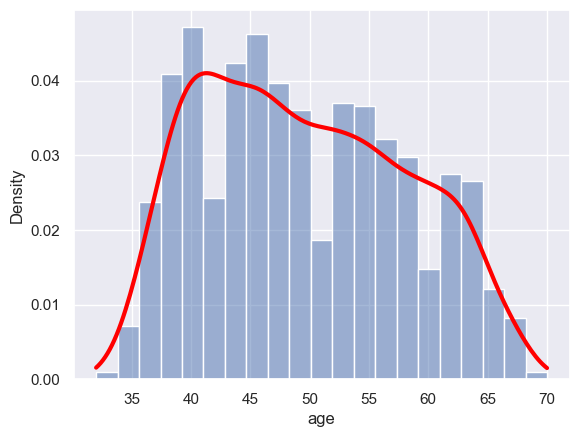

In [289]:
dens_plot = sns.histplot(data = frami, x = 'age', kde=True, stat='density')
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)

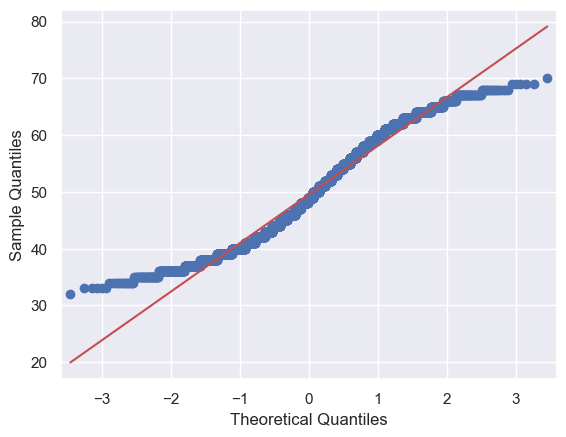

In [290]:
sm.qqplot(frami.age, line="s")
plt.show()
#Cuanto mas se aproxime a una normal mas alineados estan con los puntos de la recta

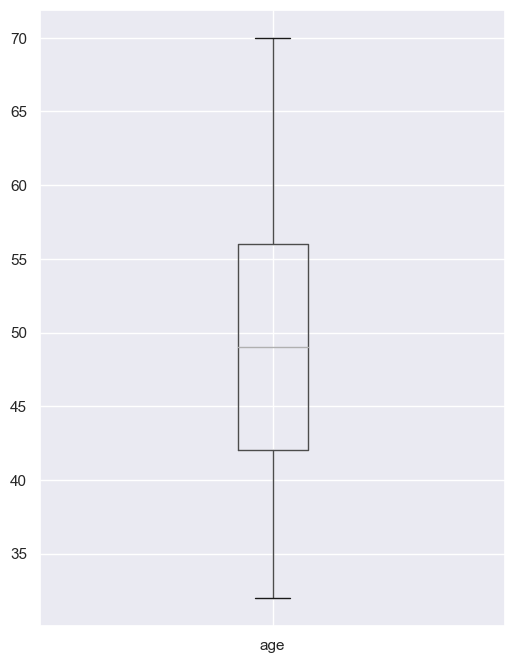

In [291]:
getPlot = frami.boxplot(column='age', figsize=(6, 8))

## C24
+ Divide la variable edad en 4 subintervalos de longitud 10 años y llama franjaEdad al resultado.
+ Divide el colesterol en intervalos de 100 unidades desde 100 hasta 600 y llama nivelCol al resultado.
+ Ahora estudia la psible relación entre franjaEdad y nivelCol.

+ Divide la variable edad en 4 subintervalos de longitud 10 años y llama franjaEdad al resultado.

In [228]:
cortes=np.arange(32,75,10)
print(cortes)
frami['franja_edad']=pd.cut(frami['age'],bins=cortes,ordered=True)

[32 42 52 62 72]


+ Divide el colesterol en intervalos de 100 unidades desde 100 hasta 600 y llama nivelCol al resultado.

In [229]:
cortes=np.arange(100,601,100)
print(cortes)
frami['nivelCol']=pd.cut(frami['totChol'],bins=cortes,ordered=True)

[100 200 300 400 500 600]


In [230]:
frami.info() ##Veo que estan las dos varibles ahi 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   male             3658 non-null   int64   
 1   age              3658 non-null   int64   
 2   education        3658 non-null   float64 
 3   currentSmoker    3658 non-null   int64   
 4   cigsPerDay       3658 non-null   float64 
 5   BPMeds           3658 non-null   float64 
 6   prevalentStroke  3658 non-null   int64   
 7   prevalentHyp     3658 non-null   int64   
 8   diabetes         3658 non-null   int64   
 9   totChol          3658 non-null   float64 
 10  sysBP            3658 non-null   float64 
 11  diaBP            3658 non-null   float64 
 12  BMI              3658 non-null   float64 
 13  heartRate        3658 non-null   float64 
 14  glucose          3658 non-null   float64 
 15  TenYearCHD       3658 non-null   int64   
 16  franja_edad      3657 non-null   category


+ Ahora estudia la psible relación entre franjaEdad y nivelCol.

In [219]:
CT = pd.crosstab(frami['franja_edad'], frami['nivelCol'])
CT

nivelCol,"(100, 200]","(200, 300]","(300, 400]","(400, 500]","(500, 600]"
franja_edad,,,,,
"(32, 42]",365,547,38,3,0
"(42, 52]",235,1013,88,3,1
"(52, 62]",126,800,120,2,0
"(62, 72]",39,247,30,0,0


nivelCol     (100, 200]  (200, 300]  (300, 400]  (400, 500]  (500, 600]
franja_edad                                                            
(62, 72]           6.17       39.08        4.75        0.00        0.00
(32, 42]          19.15       28.70        1.99        0.16        0.00
(52, 62]           6.01       38.17        5.73        0.10        0.00
(42, 52]           8.77       37.80        3.28        0.11        0.04


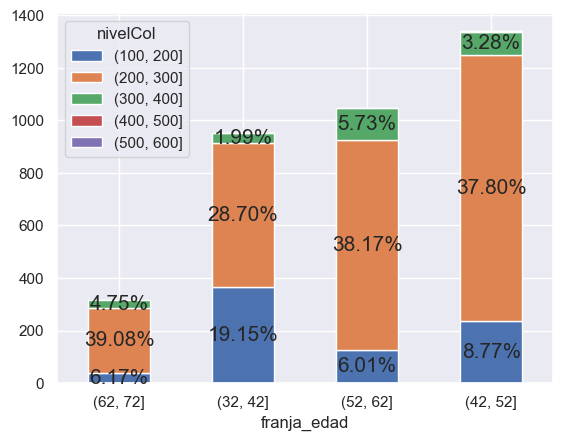

In [231]:
# We add to the table the totals for each row
CT['total'] = CT.sum(axis=1)
# Sort the table using those totals
CT.sort_values('total', inplace=True)
# Remove them so thay do not interfere with the graphic
CT2= CT.drop(columns='total')

percents = CT2.div(CT.total, axis = 0).mul(100).round(2)
print(percents)
percents.iloc[:, 0]
ax = CT2.plot.bar(stacked = True, rot = 0)

for i in range(len(ax.containers)):
    c = ax.containers[i]  
    # percent labels (or empty string below a threshold for close to 0%)
    labels = [f'{v:2.2f}%' if (v > 1) else '' for v in percents.iloc[:, i]]  
    # add labels to bars
    ax.bar_label(c, labels=labels, label_type='center',   fontsize=15)

plt.show() 